[Local](./ch04.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/ch04.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/ch04.ipynb)

[TextBook@greenteapress](http://greenteapress.com/thinkdsp/html/thinkdsp005.html)


# Chapter 4  Noise

In English, “noise” means an unwanted or unpleasant sound. In the context of signal processing, it has two different senses:

As in English, it can mean an unwanted signal of any kind. If two signals interfere with each other, each signal would consider the other to be noise. “Noise” also refers to a signal that contains components at many frequencies, so it lacks the harmonic structure of the periodic signals we saw in previous chapters.
This chapter is about the second kind.

The code for this chapter is in [chap04.ipynb](chap04.ipynb), which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp04.

First of all, let's generate a white noise signal using Audacity.

![](fg/fg_audacity_03_whiteNoise.png)

## 4.1  Uncorrelated noise

![](http://greenteapress.com/thinkdsp/html/thinkdsp018.png)
Figure 4.1: Waveform of uncorrelated uniform noise.

The simplest way to understand noise is to generate it, and the simplest kind to generate is `uncorrelated uniform noise` (UU noise). 

- “Uniform” means the signal contains random values from a uniform distribution; that is, every value in the range is equally likely. 
- “Uncorrelated” means that the values are independent; that is, knowing one value provides no information about the others.

Here’s a class that represents UU noise:

```python
class _Noise(Signal):
    """Represents a noise signal (abstract parent class)."""

    def __init__(self, amp=1.0):
        """Initializes a white noise signal.

        amp: float amplitude, 1.0 is nominal max
        """
        self.amp = amp

    @property
    def period(self):
        """Period of the signal in seconds.

        returns: float seconds
        """
        return ValueError("Non-periodic signal.")
    
class UncorrelatedUniformNoise(_Noise):
    """Represents uncorrelated uniform noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ys = np.random.uniform(-self.amp, self.amp, len(ts))
        return ys
```

----

- Reviewing `class Signal`

```python
class Signal:
    """Represents a time-varying signal."""

    def __add__(self, other):
        
    @property
    def period(self):
        
    def plot(self, framerate=11025):
    
    def make_wave(self, duration=1, start=0, framerate=11025):
                
```



`class UncorrelatedUniformNoise` 
inherits from `class _Noise`, 
which inherits from `class Signal`.

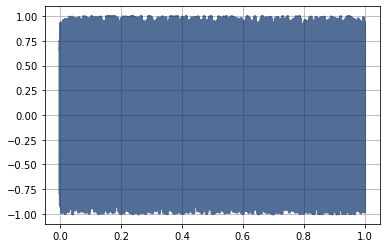

In [7]:
import thinkdsp as td
x= td.UncorrelatedUniformNoise()
w= x.make_wave()
w.plot()

In [8]:
w.make_audio()

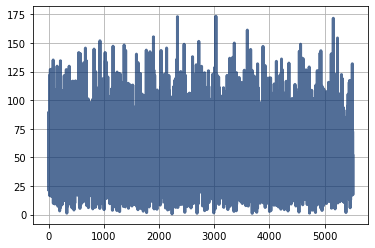

In [4]:
w.make_spectrum().plot()

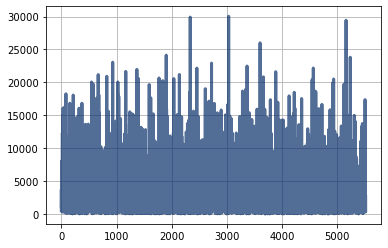

In [5]:
w.make_spectrum().plot_power()

In [ ]:
w.make_spectrogram(seg_length=256).plot()

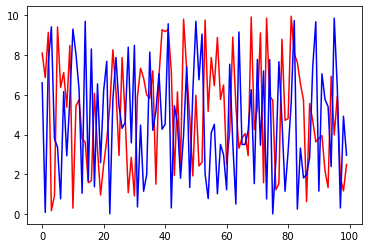

In [32]:
import numpy as np
import matplotlib.pyplot as pl

x100= np.random.uniform(0,10,100)
pl.plot(x100,'r')
x101= np.random.uniform(0,10,100)
pl.plot(x101,'b')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

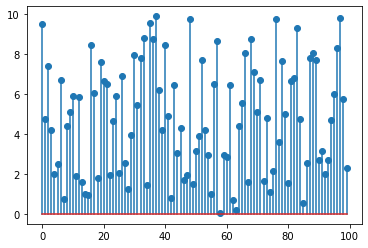

In [26]:
x101= np.random.uniform(0,10,100)
pl.stem(x101)

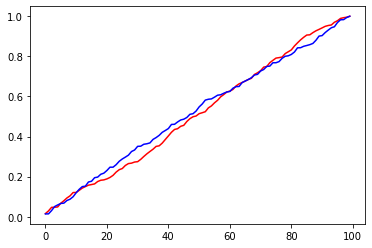

In [33]:
y100=np.cumsum(x100)
pl.plot(y100/y100[-1],'r')
y101=np.cumsum(x101)
pl.plot(y101/y101[-1],'b')

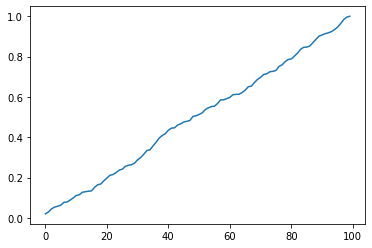

In [28]:
y101=np.cumsum(x101)
pl.plot(y101/y101[-1])

As usual, the evaluate function takes `ts`, the times when the signal should be evaluated. 
It uses `np.random.uniform`, which generates values from a uniform distribution. 
In this example, the values are in the range between `-amp` to `amp`.

The following example generates UU noise with duration 0.5 seconds at 11,025 samples per second.

```python
    signal = thinkdsp.UncorrelatedUniformNoise()
    wave = signal.make_wave(duration=0.5, framerate=11025)
```

If you play this wave, it sounds like the static you hear if you tune a radio between channels. Figure 4.1 shows what the waveform looks like. As expected, it looks pretty random.

Now let’s take a look at the spectrum:

![](http://greenteapress.com/thinkdsp/html/thinkdsp019.png)
Figure 4.2: Power spectrum of uncorrelated uniform noise.


```python
spectrum = wave.make_spectrum()
spectrum.plot_power()
```

- `Spectrum.plot_power` is similar to `Spectrum.plot`, except that it plots power instead of amplitude. 

- `Power` is the `square of amplitude`. 

I am switching from amplitude to power in this chapter because it is more conventional in the context of noise.

Figure 4.2 shows the result. Like the signal, the spectrum looks pretty random. In fact, it is random, but we have to be more precise about the word “random”. There are at least `three` things we might like to know about a noise signal or its spectrum:

- `Distribution`: 
    - The distribution of a random signal is the set of possible values and their probabilities. 

    - For example, in the `uniform` noise signal, the set of values is the range from -1 to 1, and all values have the same probability. 

    - An alternative is `Gaussian` noise, where the set of values is the range from negative to positive infinity, but values near 0 are the most likely, with probability that drops off according to the Gaussian or “bell” curve.

- `Correlation`: 
    - Is each value in the signal independent of the others, or are there dependencies between them? 
    
    - In UU noise, the values are independent, UU noise is also called `white` noise. 

    - An alternative is `Brownian` noise, where each value is the sum of the previous value and a random “step”. So if the value of the signal is high at a particular point in time, we expect it to stay high, and if it is low, we expect it to stay low.

- `Relationship` between power and frequency: 

    - In the spectrum of UU noise, the power at all frequencies is drawn from the same distribution; that is, the average power is the same for all frequencies. 

    - An alternative is `pink` noise, where power is inversely related to frequency; that is, the power at frequency $f$ is drawn from a distribution whose mean is proportional to $1/f$.

### 4.1.1 Using Audacity to generate a white noise, pink noise, and Brown noise
![](fg/fg_audacity_04_Noises.png)

### 4.1.2 thinkdsp provides ...
```python
class UncorrelatedUniformNoise(_Noise):
    """Represents uncorrelated uniform noise, aka white noise"""
class UncorrelatedGaussianNoise(_Noise):
    """Represents uncorrelated gaussian noise."""
class BrownianNoise(_Noise):
    """Represents Brownian noise, aka red noise."""
class PinkNoise(_Noise):
    """Represents pink noise"""
```

## 4.2  Integrated spectrum

For UU noise we can see the relationship between power and frequency more clearly by looking at the integrated spectrum, which is a function of frequency, f, that shows the cumulative power in the spectrum up to f.

![](http://greenteapress.com/thinkdsp/html/thinkdsp020.png)

Figure 4.3: Integrated spectrum of uncorrelated uniform noise.

Spectrum provides a method that computes the IntegratedSpectrum:

```python
    def make_integrated_spectrum(self):
        cs = np.cumsum(self.power)
        cs /= cs[-1]
        return IntegratedSpectrum(cs, self.fs)
```        
self.power is a NumPy array containing power for each frequency. np.cumsum computes the cumulative sum of the powers. Dividing through by the last element normalizes the integrated spectrum so it runs from 0 to 1.

The result is an IntegratedSpectrum. Here is the class definition:


```python
class IntegratedSpectrum(object):
    def __init__(self, cs, fs):
        self.cs = cs
        self.fs = fs
```     

Like Spectrum, IntegratedSpectrum provides plot_power, so we can compute and plot the integrated spectrum like this:

```python
    integ = spectrum.make_integrated_spectrum()
    integ.plot_power()
```    
The result, shown in Figure 4.3, is a straight line, which indicates that power at all frequencies is constant, on average. 

Noise with equal power at all frequencies is called `white noise` by analogy with light, 
because an `equal mixture` of light at all visible frequencies is white.

## 4.3  Brownian noise



![](http://greenteapress.com/thinkdsp/html/thinkdsp021.png)

Figure 4.4: Waveform of Brownian noise.

UU noise is uncorrelated, which means that each value does not depend on the others. An alternative is Brownian noise, in which each value is the sum of the previous value and a random “step”.

It is called “Brownian” by analogy with Brownian motion, in which a particle suspended in a fluid moves apparently at random, due to unseen interactions with the fluid. Brownian motion is often described using a random walk, which is a mathematical model of a path where the distance between steps is characterized by a random distribution.

In a one-dimensional random walk, the particle moves up or down by a random amount at each time step. The location of the particle at any point in time is the sum of all previous steps.

This observation suggests a way to generate Brownian noise: generate uncorrelated random steps and then add them up. Here is a class definition that implements this algorithm:

```python
class BrownianNoise(_Noise):

    def evaluate(self, ts):
        dys = np.random.uniform(-1, 1, len(ts))
        ys = np.cumsum(dys)
        ys = normalize(unbias(ys), self.amp)
        return ys
```        
evaluate uses np.random.uniform to generate an uncorrelated signal and np.cumsum to compute their cumulative sum.

Since the sum is likely to escape the range from -1 to 1, we have to use unbias to shift the mean to 0, and normalize to get the desired maximum amplitude.

Here’s the code that generates a BrownianNoise object and plots the waveform.
```python
    signal = thinkdsp.BrownianNoise()
    wave = signal.make_wave(duration=0.5, framerate=11025)
    wave.plot()
```

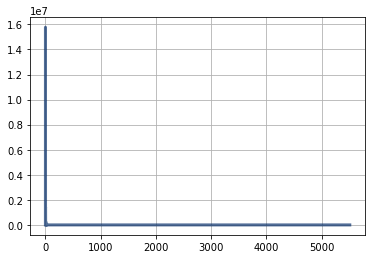

In [45]:
import thinkdsp as td
xRed= td.BrownianNoise()
wRed= xRed.make_wave()
#wRed.plot()
wRed.make_audio()
wRed.make_spectrum().plot_power()

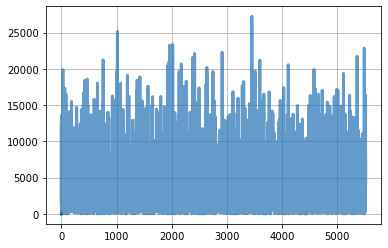

In [44]:
xWhite=td.UncorrelatedUniformNoise()
wWhite= xWhite.make_wave()
wWhite.plot()
wWhite.make_audio()
wWhite.make_spectrum().plot_power()

Figure 4.4 shows the result. The waveform wanders up and down, but there is a clear correlation between successive values. When the amplitude is high, it tends to stay high, and vice versa.

![](http://greenteapress.com/thinkdsp/html/thinkdsp022.png)
Figure 4.5: Spectrum of Brownian noise on a linear scale (left) and log-log scale (right).

If you plot the spectrum of Brownian noise on a linear scale, as in Figure 4.5 (left), it doesn’t look like much. Nearly all of the power is at the lowest frequencies; the higher frequency components are not visible.

To see the shape of the spectrum more clearly, we can plot power and frequency on a log-log scale. Here’s the code:

```python
import matplotlib.pyplot as plt
 
    spectrum = wave.make_spectrum()
    spectrum.plot_power(linewidth=1, alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
```

The result is in Figure 4.5 (right). The relationship between power and frequency is noisy, but roughly linear.

`class IntegratedSpectrum` provides estimate_slope, which uses SciPy to compute a least squares fit to the power spectrum:

```python

class IntegratedSpectrum:
    
    def estimate_slope(self):
        x = np.log(self.fs[1:])
        y = np.log(self.power[1:])
        t = scipy.stats.linregress(x,y)
        return t
```

It discards the first component of the spectrum because this component corresponds to f=0, and log(0) is undefined.

estimate_slope returns the result from scipy.stats.linregress which is an object that contains the estimated slope and intercept, coefficient of determination ($R^2$), p-value, and standard error. For our purposes, we only need the slope.

For Brownian noise, the slope of the power spectrum is -2 (we’ll see why in Chapter 9), so we can write this relationship:

$log(P) = k −2 log(f) $

where P is power, f is frequency, and k is the intercept of the line, which is not important for our purposes. Exponentiating both sides yields:

$P = K / f^2 $

where K is $e^k$, but still not important. More relevant is that power is proportional to $1/f^2$, which is characteristic of Brownian noise.

`Brownian noise` is also called `red noise`, for the same reason that white noise is called “white”. 

If you combine visible light with power proportional to $1/f^2$, most of the power would be at the low-frequency end of the spectrum, which is red. 

Brownian noise is also sometimes called “brown noise”, but I think that’s confusing, so I won’t use it.

## 4.4  Pink Noise



![](http://greenteapress.com/thinkdsp/html/thinkdsp023.png)
Figure 4.6: Waveform of pink noise with β=1.

For red noise, the relationship between frequency and power is

$P = K / f^2$ 

There is nothing special about the exponent 2. 

More generally, we can synthesize noise with any exponent, β.

$P = K / f^β$ 

- When β = 0, power is constant at all frequencies, so the result is white noise. 
- When β = 2 the result is red noise.
- When β is between 0 and 2, the result is between white and red noise, so it is called pink noise.

There are several ways to generate pink noise. The simplest is to generate white noise and then apply a low-pass filter with the desired exponent. thinkdsp provides a class that represents a pink noise signal:

```python
class PinkNoise(_Noise):

    def __init__(self, amp=1.0, beta=1.0):
        self.amp = amp
        self.beta = beta
```

amp is the desired amplitude of the signal. β (beta) is the desired exponent. 
PinkNoise provides make_wave, which generates a Wave.

```python
    def make_wave(self, duration=1, start=0, framerate=11025):
        signal = UncorrelatedUniformNoise()
        wave = signal.make_wave(duration, start, framerate)
        spectrum = wave.make_spectrum()

        spectrum.pink_filter(beta=self.beta)

        wave2 = spectrum.make_wave()
        wave2.unbias()
        wave2.normalize(self.amp)
        return wave2
```
duration is the length of the wave in seconds. start is the start time of the wave; it is included so that make_wave has the same interface for all types of signal, but for random noise, start time is irrelevant. And framerate is the number of samples per second.


![](http://greenteapress.com/thinkdsp/html/thinkdsp024.png)
Figure 4.7: Spectrum of white, pink, and red noise on a log-log scale.

make_wave creates a white noise wave, computes its spectrum, applies a filter with the desired exponent, and then converts the filtered spectrum back to a wave. Then it unbiases and normalizes the wave.

Spectrum provides pink_filter:

```python
    def pink_filter(self, beta=1.0):
        denom = self.fs ** (beta/2.0)
        denom[0] = 1
        self.hs /= denom
```
pink_filter divides each element of the spectrum by $f^{β/2}$. Since power is the square of amplitude, this operation divides the power at each component by $f^β$. It treats the component at f=0 as a special case, partly to avoid dividing by 0, and partly because this element represents the bias of the signal, which we are going to set to 0 anyway.

Figure 4.6 shows the resulting waveform. Like Brownian noise, it wanders up and down in a way that suggests correlation between successive values, but at least visually, it looks more random. In the next chapter we will come back to this observation and I will be more precise about what I mean by “correlation” and “more random”.

Finally, Figure 4.7 shows a spectrum for white, pink, and red noise on the same log-log scale. The relationship between the exponent, β, and the slope of the spectrum is apparent in this figure.

## 4.5  Gaussian noise

![](http://greenteapress.com/thinkdsp/html/thinkdsp025.png)

Figure 4.8: Normal probability plot for the real and imaginary parts of the spectrum of Gaussian noise.
We started with uncorrelated uniform (UU) noise and showed that, because its spectrum has equal power at all frequencies, on average, UU noise is white.

But when people talk about “white noise”, they don’t always mean UU noise. In fact, more often they mean uncorrelated Gaussian (UG) noise.

thinkdsp provides an implementation of UG noise:

```python
class UncorrelatedGaussianNoise(_Noise):

    def evaluate(self, ts):
        ys = np.random.normal(0, self.amp, len(ts))
        return ys
```

np.random.normal returns a NumPy array of values from a Gaussian distribution, in this case with mean 0 and standard deviation self.amp. In theory the range of values is from negative to positive infinity, but we expect about 99% of the values to be between -3 and 3.

UG noise is similar in many ways to UU noise. The spectrum has equal power at all frequencies, on average, so UG is also white. And it has one other interesting property: the spectrum of UG noise is also UG noise. More precisely, the real and imaginary parts of the spectrum are uncorrelated Gaussian values.

To test that claim, we can generate the spectrum of UG noise and then generate a “normal probability plot”, which is a graphical way to test whether a distribution is Gaussian.

```python
    signal = thinkdsp.UncorrelatedGaussianNoise()
    wave = signal.make_wave(duration=0.5, framerate=11025)
    spectrum = wave.make_spectrum()

    thinkstats2.NormalProbabilityPlot(spectrum.real)
    thinkstats2.NormalProbabilityPlot(spectrum.imag)
```

NormalProbabilityPlot is provided by thinkstats2, which is included in the repository for this book. If you are not familiar with normal probability plots, you can read about them in Chapter 5 of Think Stats at http://thinkstats2.com.

Figure 4.8 shows the results. The gray lines show a linear model fit to the data; the dark lines show the data.

A straight line on a normal probability plot indicates that the data come from a Gaussian distribution. Except for some random variation at the extremes, these lines are straight, which indicates that the spectrum of UG noise is UG noise.

The spectrum of UU noise is also UG noise, at least approximately. In fact, by the Central Limit Theorem, the spectrum of almost any uncorrelated noise is approximately Gaussian, as long as the distribution has finite mean and standard deviation, and the number of samples is large.

## 4.6  Exercises

Solutions to these exercises are in chap04soln.ipynb.

Exercise 1   

“A Soft Murmur” is a web site that plays a mixture of natural noise sources, including rain, waves, wind, etc. At http://asoftmurmur.com/about/ you can find their list of recordings, most of which are at http://freesound.org.
Download a few of these files and compute the spectrum of each signal. Does the power spectrum look like white noise, pink noise, or Brownian noise? How does the spectrum vary over time?

Exercise 2   

In a noise signal, the mixture of frequencies changes over time. In the long run, we expect the power at all frequencies to be equal, but in any sample, the power at each frequency is random.
To estimate the long-term average power at each frequency, we can break a long signal into segments, compute the power spectrum for each segment, and then compute the average across the segments. You can read more about this algorithm at http://en.wikipedia.org/wiki/Bartlett's_method.

Implement Bartlett’s method and use it to estimate the power spectrum for a noise wave. Hint: look at the implementation of make_spectrogram.

Exercise 3   

At http://www.coindesk.com you can download the daily price of a BitCoin as a CSV file. Read this file and compute the spectrum of BitCoin prices as a function of time. Does it resemble white, pink, or Brownian noise?

Exercise 4   

A Geiger counter is a device that detects radiation. When an ionizing particle strikes the detector, it outputs a surge of current. The total output at a point in time can be modeled as uncorrelated Poisson (UP) noise, where each sample is a random quantity from a Poisson distribution, which corresponds to the number of particles detected during an interval.
Write a class called UncorrelatedPoissonNoise that inherits from thinkdsp._Noise and provides evaluate. It should use np.random.poisson to generate random values from a Poisson distribution. The parameter of this function, lam, is the average number of particles during each interval. You can use the attribute amp to specify lam. For example, if the frame rate is 10 kHz and amp is 0.001, we expect about 10 “clicks” per second.

Generate about a second of UP noise and listen to it. For low values of amp, like 0.001, it should sound like a Geiger counter. For higher values it should sound like white noise. Compute and plot the power spectrum to see whether it looks like white noise.

Exercise 5   

The algorithm in this chapter for generating pink noise is conceptually simple but computationally expensive. There are more efficient alternatives, like the Voss-McCartney algorithm. Research this method, implement it, compute the spectrum of the result, and confirm that it has the desired relationship between power and frequency.